In [1]:
# pip install shap

  Using cached packaging-21.3-py3-none-any.whl (40 kB)

  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


<AxesSubplot:>

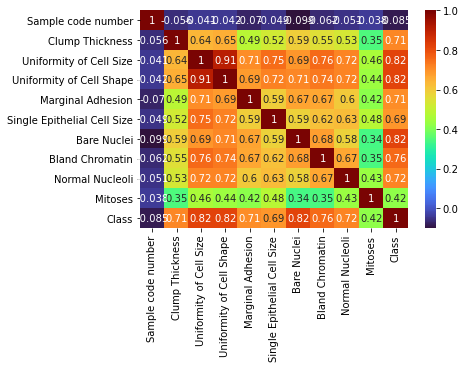

In [27]:
#plt.figsize(15, 8)
sns.heatmap(df.corr(), annot=True, cmap='turbo')

In [9]:
X = df.iloc[:, 1:10]
y = df.iloc[:, -1]

In [10]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [11]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
X_train.shape

(546, 9)

In [16]:
y_train.shape

(546,)

LogisticRegression Model

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
lr_pred = lr.predict(X_test)

In [20]:
lr_pred

array([2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [22]:
accuracy_score(y_test, lr_pred)

0.9854014598540146

In [23]:
import shap

In [28]:
explainer = shap.LinearExplainer(lr, X_train)

In [29]:
base_value = explainer.expected_value

In [30]:
base_value

-0.47895907998918297

In [31]:
shap_values = explainer.shap_values(X_test)
shap_values

array([[ 0.04318832,  0.20267311, -0.97358033, ..., -0.77069792,
        -0.53363454, -0.35825132],
       [-1.87629237,  0.20267311, -0.97358033, ..., -0.34014042,
        -0.53363454, -0.35825132],
       [-0.43668186,  0.20267311, -0.97358033, ..., -0.34014042,
        -0.53363454, -0.35825132],
       ...,
       [-0.91655203,  0.20267311, -0.57781597, ..., -0.77069792,
        -0.53363454, -0.35825132],
       [-1.3964222 ,  0.03307218, -0.57781597, ..., -0.34014042,
        -0.53363454, -0.35825132],
       [ 1.48279883, -0.05172828,  1.40100585, ..., -0.34014042,
         1.59028403,  0.16858886]])

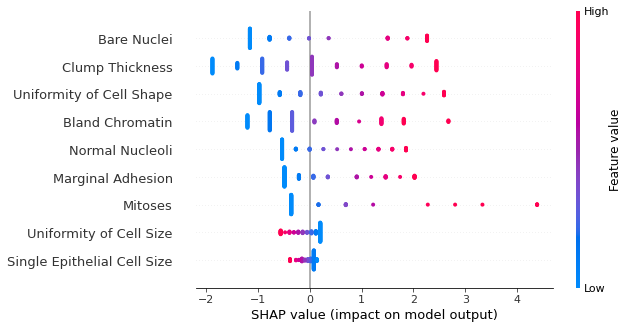

In [32]:
shap.summary_plot(shap_values, X_test)

In [33]:
shap.initjs()
shap.force_plot(base_value, shap_values[0], X_test.iloc[0])

In [34]:
shap_values[0]

array([ 0.04318832,  0.20267311, -0.97358033,  0.90582218,  0.02123941,
       -1.15354373, -0.77069792, -0.53363454, -0.35825132])

In [35]:
pd.DataFrame(data = shap_values, columns=X_test.columns)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.043188,0.202673,-0.973580,0.905822,0.021239,-1.153544,-0.770698,-0.533635,-0.358251
1,-1.876292,0.202673,-0.973580,-0.487750,0.078643,-1.153544,-0.340140,-0.533635,-0.358251
2,-0.436682,0.202673,-0.973580,-0.487750,0.078643,-1.153544,-0.340140,-0.533635,-0.358251
3,1.002929,-0.390930,1.401006,-0.209036,-0.036164,1.502642,-0.340140,1.324794,0.168589
4,-1.876292,0.202673,-0.973580,-0.487750,0.078643,-1.153544,-1.201255,-0.533635,-0.358251
...,...,...,...,...,...,...,...,...,...
132,-1.876292,0.202673,-0.973580,-0.487750,0.078643,-1.153544,-0.340140,-0.533635,-0.358251
133,-1.876292,0.202673,-0.973580,-0.487750,0.136047,-1.153544,-0.770698,-0.533635,-0.358251
134,-0.916552,0.202673,-0.577816,-0.487750,0.078643,-1.153544,-0.770698,-0.533635,-0.358251
135,-1.396422,0.033072,-0.577816,-0.209036,0.078643,-0.774089,-0.340140,-0.533635,-0.358251


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


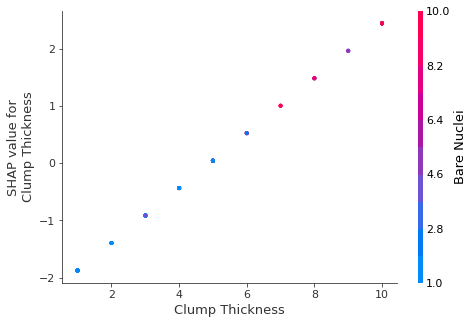

In [37]:
shap.dependence_plot('Clump Thickness', shap_values, X_test, interaction_index='Bare Nuclei')

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


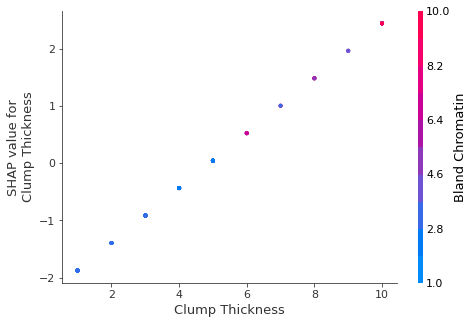

In [38]:
shap.dependence_plot('Clump Thickness', shap_values, X_test)

In [39]:
df1 = pd.read_csv('diamonds.csv')

In [40]:
df1.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [41]:
df1['cut'].value_counts()

Ideal        19977
Premium      12792
Very Good    11184
Good          4547
Fair          1500
Name: cut, dtype: int64

In [42]:
df1['color'].value_counts()

G    10448
E     9056
F     8843
H     7704
D     6268
I     5076
J     2605
Name: color, dtype: int64

In [43]:
df1['clarity'].value_counts()

SI1     12097
VS2     11355
SI2      8523
VS1      7599
VVS2     4700
VVS1     3379
IF       1661
I1        686
Name: clarity, dtype: int64

In [44]:
df1.describe()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.798597,3.903980,4.126700,3939.103500
std,14433.901067,0.474651,1.117043,1.665564,3995.879832
min,1.000000,0.200000,1.000000,1.000000,326.000000
25%,12500.750000,0.400000,3.000000,3.000000,948.000000
50%,25000.500000,0.700000,4.000000,4.000000,2402.500000
75%,37500.250000,1.040000,5.000000,5.000000,5331.000000
max,50000.000000,5.010000,5.000000,8.000000,18823.000000


<AxesSubplot:>

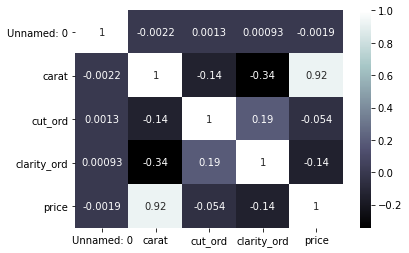

In [45]:
sns.heatmap(df1.corr(), annot = True, cmap = 'bone')

In [46]:
X = df1.iloc[:, [1,3,6]]
y = df1.iloc[:, -1]

In [47]:
X

,carat,cut_ord,clarity_ord
0,0.51,4,4
1,2.25,1,1
2,0.70,3,5
3,0.47,2,4
4,0.30,5,7
...,...,...,...
49995,0.71,5,7
49996,0.43,5,6
49997,1.14,4,5
49998,1.01,4,5


In [48]:
y

0        1749
1        7069
2        2757
3        1243
4         789
         ... 
49995    2918
49996    1056
49997    6619
49998    6787
49999    9428
Name: price, Length: 50000, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.6080254 ,  0.08595995, -0.0760711 ],
       [ 3.05785977, -2.59972891, -1.87728106],
       [-0.20772759, -0.80926967,  0.52433222],
       ...,
       [ 0.71927785,  0.08595995,  0.52433222],
       [ 0.44538988,  0.08595995,  0.52433222],
       [ 2.0465811 ,  0.08595995,  0.52433222]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf = RandomForestRegressor(n_estimators=50, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [68]:
y_pred = rf.predict(X_test)

In [73]:
explainer = shap.TreeExplainer(rf)

In [74]:
base_value = explainer.expected_value

In [75]:
base_value

array([3934.7177675])

In [76]:
shap_values = explainer.shap_values(X_test)


In [77]:
shap_values

array([[-2149.77405607,   -15.70904284,  -614.81758234],
       [-2665.19751911,   125.41947756,   987.01514851],
       [ 1711.95299684,    20.98836275,   331.88047693],
       ...,
       [ 4715.39002942,    63.30105592,  -570.43785284],
       [-3634.13272846,   100.27033812,   255.89313742],
       [-3453.71336719,   -64.25626204,   243.08834098]])

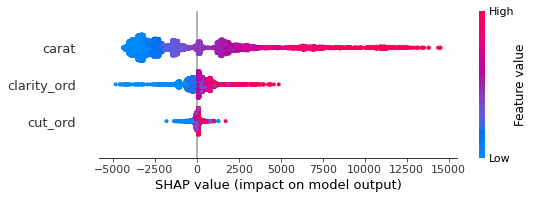

In [78]:
shap.summary_plot(shap_values, X_test)

In [79]:
#shap.initjs()
shap.force_plot(base_value, shap_values[0], X_test.iloc[0])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


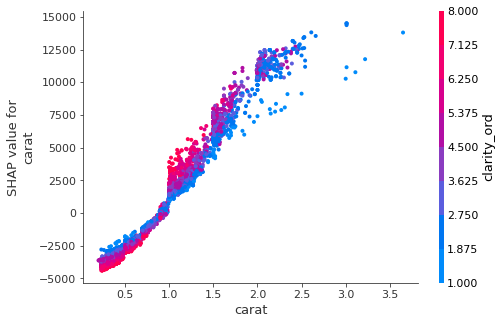

In [80]:
shap.dependence_plot('carat', shap_values, X_test)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


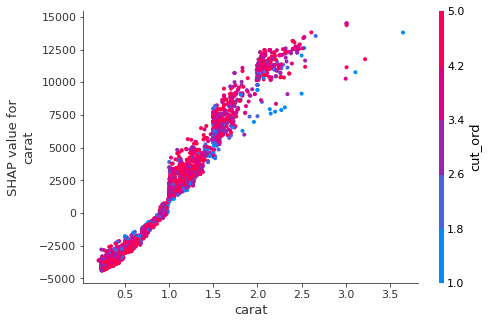

In [82]:
shap.dependence_plot('carat', shap_values, X_test, interaction_index='cut_ord')